In [1]:
# Load packages we will need
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn import neighbors

# Trees
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

# Model selection
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split


from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor \
     , RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df = pd.read_csv(r"C:\Users\shipa\OneDrive\Desktop\STAT 724\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
len(df['Surname'].unique()), len(df['RowNumber'].unique())

(2932, 10000)

In [5]:
df.shape

(10000, 14)

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
len(df['Surname'].unique())

2932

In [8]:
df1 = df.copy()
df1 = df1.drop(["RowNumber", "CustomerId", "Surname", "IsActiveMember"], axis=1)

In [9]:
df1["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df1 = pd.concat([df1, pd.get_dummies(df1['Geography'], drop_first=True, prefix="geo")], axis=1)

In [11]:
df1 = df1.drop("Geography", axis=1)

In [12]:
df1 = pd.concat([df1, pd.get_dummies(df1['Gender'], drop_first=True)], axis=1)

In [13]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,geo_Germany,geo_Spain,Male
0,619,Female,42,2,0.00,1,1,101348.88,1,0,0,0
1,608,Female,41,1,83807.86,1,0,112542.58,0,0,1,0
2,502,Female,42,8,159660.80,3,1,113931.57,1,0,0,0
3,699,Female,39,1,0.00,2,0,93826.63,0,0,0,0
4,850,Female,43,2,125510.82,1,1,79084.10,0,0,1,0


In [14]:
df1 = df1.drop("Gender", axis=1)

In [15]:
df1.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
EstimatedSalary    float64
Exited               int64
geo_Germany          uint8
geo_Spain            uint8
Male                 uint8
dtype: object

In [16]:
df1.isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
EstimatedSalary    0
Exited             0
geo_Germany        0
geo_Spain          0
Male               0
dtype: int64

In [17]:
df1[df1['CreditScore']==0]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,geo_Germany,geo_Spain,Male


In [18]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,geo_Germany,geo_Spain,Male
0,619,42,2,0.00,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,1,0


In [19]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,geo_Germany,geo_Spain,Male
0,619,42,2,0.00,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,1,0


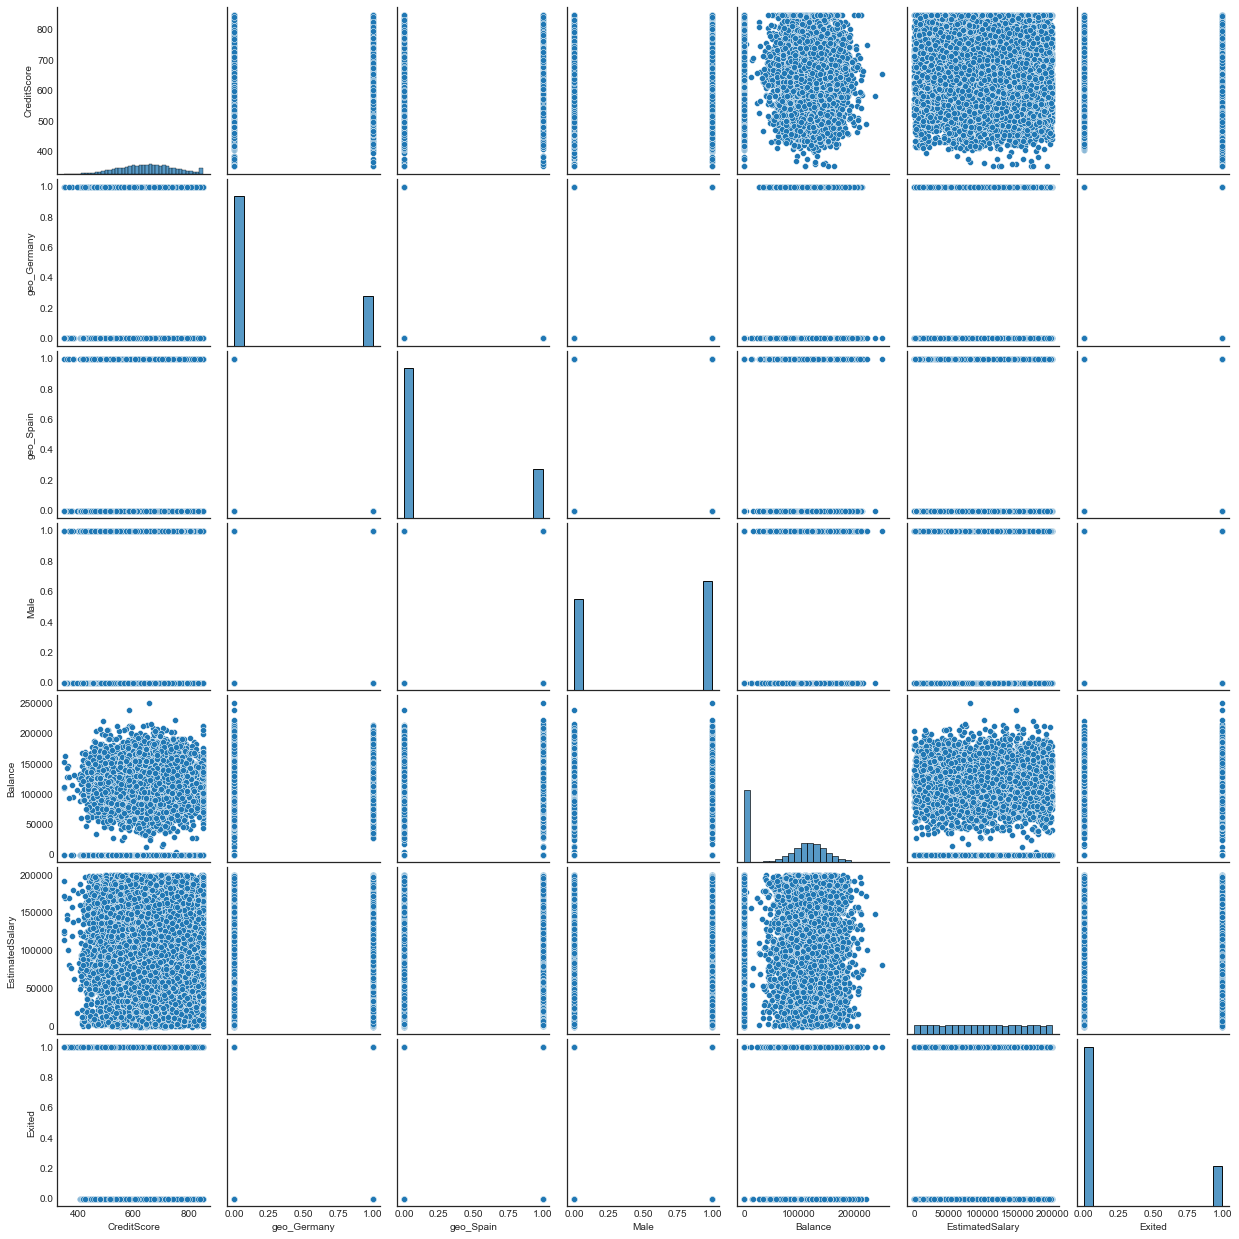

In [20]:
sns.pairplot(df1[["CreditScore", "geo_Germany", "geo_Spain", "Male", "Balance", "EstimatedSalary", "Exited"]])

In [21]:
X = df1.drop("Exited", axis=1)
y = df1['Exited']

In [22]:
X.shape, y.shape

((10000, 10), (10000,))

In [23]:
X.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,geo_Germany,geo_Spain,Male
9995,771,39,5,0.00,2,1,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,92888.52,1,0,1
9999,792,28,4,130142.79,1,1,38190.78,0,0,0


In [24]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [26]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,geo_Germany,geo_Spain,Male
2228,644,37,8,0.00,2,1,20968.88,0,0,0
5910,481,39,6,0.00,1,1,24677.54,0,0,0
1950,680,37,10,123806.28,1,1,81776.84,0,0,0
2119,690,29,5,0.00,2,1,108577.97,0,0,1
5947,656,45,7,145933.27,1,1,199392.14,0,0,0


In [27]:
y_test

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
5273    0
8014    0
8984    0
6498    0
6327    0
Name: Exited, Length: 3000, dtype: int64

In [78]:
#Checking effect of num of products
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,geo_Germany,geo_Spain,Male
0,619,42,2,0.00,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,1,0


In [30]:
numProduct = df1[['NumOfProducts', 'Exited']]

In [32]:
numProduct

,NumOfProducts,Exited
0,1,1
1,1,0
2,3,1
3,2,0
4,1,0
...,...,...
9995,2,0
9996,1,0
9997,1,1
9998,2,1


In [35]:
numProduct.groupby("NumOfProducts")

In [46]:
numProduct["NumOfProducts"].max()

4

In [49]:
num = numProduct.groupby("NumOfProducts")["Exited"].mean()

In [55]:
num.index

Int64Index([1, 2, 3, 4], dtype='int64', name='NumOfProducts')

Text(0, 0.5, 'Proportion that Exited')

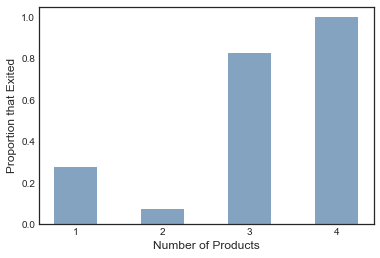

In [77]:
plt.bar(num.index, num, tick_label = [1, 2, 3, 4], width = .5, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel("Number of Products", fontsize='12')
plt.ylabel("Proportion that Exited", fontsize='12')

In [80]:
numProduct[numProduct['Exited']==0]

,NumOfProducts,Exited
1,1,0
3,2,0
4,1,0
6,2,0
8,2,0
...,...,...
9993,1,0
9994,2,0
9995,2,0
9996,1,0


<b>Logistic Regression</b>

In [30]:
XL = sm.add_constant(X)

In [31]:
#Train Test Split
XL_train, XL_test, yL_train, yL_test = train_test_split(XL, y, train_size=0.7, random_state=1)

In [32]:
clf = sm.Logit(yL_train, XL_train)
result = clf.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.446639
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6989
Method:                           MLE   Df Model:                           10
Date:                Thu, 26 Jan 2023   Pseudo R-squ.:                  0.1109
Time:                        14:30:49   Log-Likelihood:                -3126.5
converged:                       True   LL-Null:                       -3516.6
Covariance Type:            nonrobust   LLR p-value:                3.504e-161
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.5209      0.285    -12.350      0.000      -4.080      -2.962
CreditScore   

In [33]:
# Confusion matrix

def plot_cm(labels, predictions, p=0.5):
    
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])
    print('Total Positive (Actual): ', np.sum(cm[1]))
    print('Accuracy: ', ((cm[1][1])+(cm[0][0]))/3000)

True Negatives:  2301
False Positives:  72
False Negatives:  565
True Positives:  62
Total Positive (Actual):  627
Accuracy:  0.7876666666666666


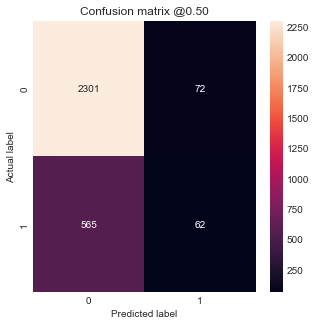

In [34]:
plot_cm(yL_test, result.predict(XL_test))

<b>Quadratic Discriminant Analysis</b>

In [125]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

True Negatives:  2265
False Positives:  108
False Negatives:  432
True Positives:  195
Total Positive (Actual):  627
Accuracy:  0.82


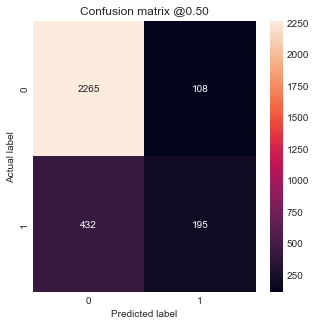

In [92]:
plot_cm(y_test, qda.predict(X_test))

<b>Decision Tree Classifier</b>

In [42]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

True Negatives:  2006
False Positives:  367
False Negatives:  317
True Positives:  310
Total Positive (Actual):  627
Accuracy:  0.772


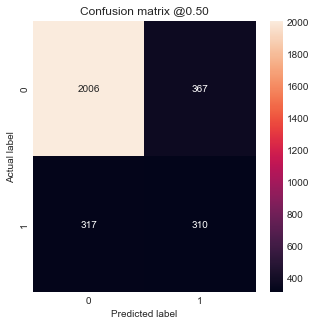

In [102]:
plot_cm(y_test, decision_tree.predict(X_test))

In [44]:
from sklearn import tree

In [107]:
tree_interpretable = DecisionTreeClassifier(max_depth=3)
tree_interpretable.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
text_representation = tree.export_text(tree_interpretable)
print(text_representation)

|--- feature_1 <= 42.50
|   |--- feature_4 <= 2.50
|   |   |--- feature_4 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  1.50
|   |   |   |--- class: 0
|   |--- feature_4 >  2.50
|   |   |--- feature_3 <= 55948.91
|   |   |   |--- class: 0
|   |   |--- feature_3 >  55948.91
|   |   |   |--- class: 1
|--- feature_1 >  42.50
|   |--- feature_4 <= 2.50
|   |   |--- feature_4 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  1.50
|   |   |   |--- class: 0
|   |--- feature_4 >  2.50
|   |   |--- feature_1 <= 66.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  66.00
|   |   |   |--- class: 0



[Text(0.5, 0.875, 'Age <= 42.5\nsamples = 7000\nvalue = [5590, 1410]\nclass = Stayed'),
 Text(0.25, 0.625, 'NumOfProducts <= 2.5\nsamples = 4993\nvalue = [4407, 586]\nclass = Stayed'),
 Text(0.125, 0.375, 'NumOfProducts <= 1.5\nsamples = 4874\nvalue = [4375, 499]\nclass = Stayed'),
 Text(0.0625, 0.125, 'samples = 2403\nvalue = [2014, 389]\nclass = Stayed'),
 Text(0.1875, 0.125, 'samples = 2471\nvalue = [2361, 110]\nclass = Stayed'),
 Text(0.375, 0.375, 'Balance <= 55948.91\nsamples = 119\nvalue = [32, 87]\nclass = Exited'),
 Text(0.3125, 0.125, 'samples = 52\nvalue = [27, 25]\nclass = Stayed'),
 Text(0.4375, 0.125, 'samples = 67\nvalue = [5, 62]\nclass = Exited'),
 Text(0.75, 0.625, 'NumOfProducts <= 2.5\nsamples = 2007\nvalue = [1183, 824]\nclass = Stayed'),
 Text(0.625, 0.375, 'NumOfProducts <= 1.5\nsamples = 1893\nvalue = [1178, 715]\nclass = Stayed'),
 Text(0.5625, 0.125, 'samples = 1136\nvalue = [559, 577]\nclass = Exited'),
 Text(0.6875, 0.125, 'samples = 757\nvalue = [619, 138]\

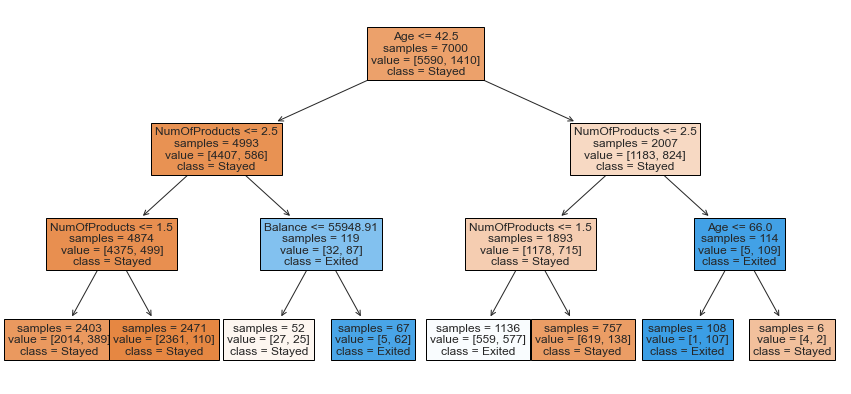

In [108]:
plt.figure(figsize=(15,7))
tree.plot_tree(tree_interpretable,
               feature_names=X_train.columns,
               class_names=["Stayed", "Exited"],
               filled=True,
               impurity=False,
               fontsize=12,
              )

True Negatives:  2127
False Positives:  246
False Negatives:  281
True Positives:  346
Total Positive (Actual):  627
Accuracy:  0.8243333333333334


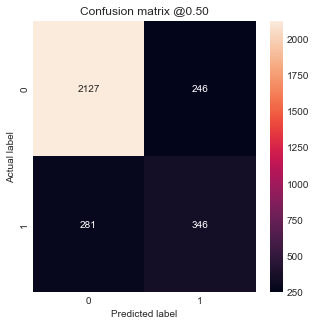

In [109]:
plot_cm(y_test, tree_interpretable.predict(X_test))

In [63]:
(y_train==1).sum()

1410

In [114]:
(2127+346)/3000

0.8243333333333334

<b>Random Forest Classifier</b>

In [100]:
random_forest = RandomForestClassifier(max_features=6, random_state=10)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features=6, random_state=10)

True Negatives:  2247
False Positives:  126
False Negatives:  322
True Positives:  305
Total Positive (Actual):  627
Accuracy:  0.8506666666666667


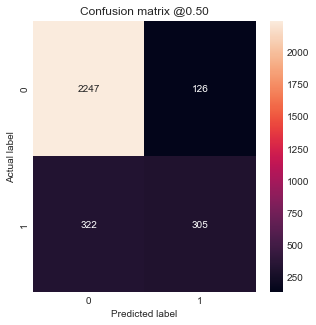

In [101]:
plot_cm(y_test, random_forest.predict(X_test))

In [123]:
#n_estimators = [int(x) for x in np.linspace(start = 50, stop = 120, num = 35)]
max_features = [2, 3, 5] #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_depth = [2, 3, 5]#6, 8, 12]
bootstrap = [True, False]

param_grid = {#'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}


In [124]:
rf_model_cv = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf_model_cv, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [125]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3, 5],
                         'max_features': [2, 3, 5]},
             verbose=2)

In [126]:
rf_grid.best_params_

{'bootstrap': False, 'max_depth': 5, 'max_features': 5}

In [127]:
#n_estimators = [int(x) for x in np.linspace(start = 50, stop = 120, num = 35)]
max_features = [4, 5, 6, 10] #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_depth = [4, 5, 7]#6, 8, 12]
bootstrap = [True, False]

param_grid = {#'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}


In [128]:
rf_model_cv = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf_model_cv, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [129]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [4, 5, 7],
                         'max_features': [4, 5, 6, 10]},
             verbose=2)

In [130]:
rf_grid.best_params_

{'bootstrap': True, 'max_depth': 7, 'max_features': 5}

In [131]:
#n_estimators = [int(x) for x in np.linspace(start = 50, stop = 120, num = 35)]
max_features = [5]
max_depth = [6, 7, 8, 10]#6, 8, 12]
bootstrap = [True, False]

param_grid = {#'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [132]:
rf_model_cv = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf_model_cv, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'bootstrap': False, 'max_depth': 7, 'max_features': 5}

In [139]:
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 98, num = 2)]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'bootstrap': bootstrap}
rf_model_cv = RandomForestClassifier(max_features=5, max_depth=7)
rf_grid = GridSearchCV(estimator = rf_model_cv, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'bootstrap': True, 'n_estimators': 80}

In [32]:
#Finally, here is random forest with best parameters
rf_final = RandomForestClassifier(max_features=5, max_depth=7, n_estimators=80, bootstrap=True)
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=5, n_estimators=80)

True Negatives:  2303
False Positives:  70
False Negatives:  369
True Positives:  258
Total Positive (Actual):  627
Accuracy:  0.8536666666666667


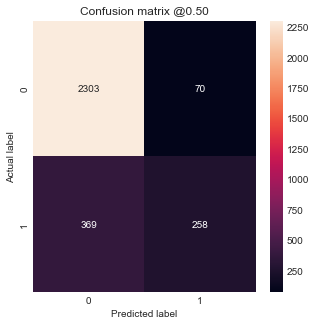

In [33]:
plot_cm(y_test, rf_final.predict(X_test))

In [115]:
0.853667-0.850667

0.0030000000000000027

In [116]:
0.851333-0.849667

0.0016660000000000563

In [117]:
0.851667-0.847667

0.0040000000000000036

<b>Boosting</b>

In [103]:
gradient_boost = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=1, max_depth=3)
gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=1)

True Negatives:  2287
False Positives:  86
False Negatives:  365
True Positives:  262
Total Positive (Actual):  627
Accuracy:  0.8496666666666667


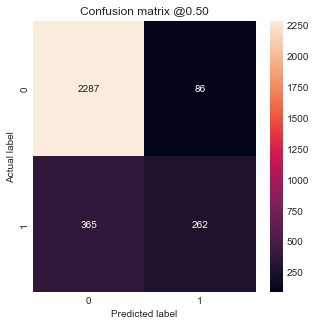

In [104]:
plot_cm(y_test, gradient_boost.predict(X_test))

In [145]:
parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[10, 100, 500]
    }
gb_grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1, verbose=3)
gb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [10, 100, 500]},
             verbose=3)

In [146]:
gb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [148]:
parameters = {
    "learning_rate": [0.01, .025, 0.05, .06],
    "max_depth":[4,5,7],
    "max_features":[5, 10,"sqrt"],
    "n_estimators":[400, 300, 500]
    }
gb_grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1, verbose=1)
gb_grid.fit(X_train, y_train)
gb_grid.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 5, 'n_estimators': 400}

In [149]:
parameters = {
    "learning_rate": [0.0085, 0.01, .02],
    "max_depth":[3,4],
    "max_features":[4, 5, 6],
    "n_estimators":[400, 450]
    }
gb_grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1, verbose=1)
gb_grid.fit(X_train, y_train)
gb_grid.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'learning_rate': 0.0085,
 'max_depth': 4,
 'max_features': 6,
 'n_estimators': 450}

In [150]:
parameters = {
    "max_features":[6, 7, 8],
    "n_estimators":[425, 450, 475]
    }
gb_grid = GridSearchCV(GradientBoostingClassifier(learning_rate=0.0085, max_depth=4), parameters, cv=3, n_jobs=-1, verbose=1)
gb_grid.fit(X_train, y_train)
gb_grid.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'max_features': 6, 'n_estimators': 425}

In [34]:
gb_final = GradientBoostingClassifier(learning_rate=0.0085, max_depth=4, max_features=6, n_estimators=425)
gb_final.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.0085, max_depth=4, max_features=6,
                           n_estimators=425)

True Negatives:  2287
False Positives:  86
False Negatives:  360
True Positives:  267
Total Positive (Actual):  627
Accuracy:  0.8513333333333334


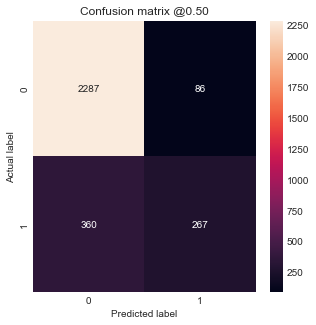

In [35]:
plot_cm(y_test, gb_final.predict(X_test))

<b>XGBoost<b>

In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
import xgboost
from xgboost import XGBClassifier

In [22]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

True Negatives:  2245
False Positives:  128
False Negatives:  329
True Positives:  298
Total Positive (Actual):  627
Accuracy:  0.8476666666666667


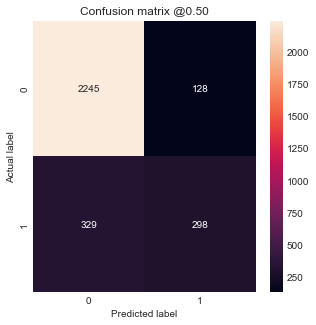

In [25]:
plot_cm(y_test, xgb.predict(X_test))

In [27]:
parameters = {
    "max_depth":[4, 6, 8],
    "learning_rate":[0.01, 0.02, 0.05],
    "max_features":[6, 7, 8],
    "n_estimators":[250, 350, 500],
    
    }
xgb_grid = GridSearchCV(XGBClassifier(), parameters, cv=3, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[10:53:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 6, 'n_estimators': 500}

In [28]:
parameters = {
    "max_depth":[3, 4, 5],
    "learning_rate":[0.007, 0.01, 0.015],
    "max_features":[4, 5, 6],
    "n_estimators":[450, 500, 600],
    
    }
xgb_grid = GridSearchCV(XGBClassifier(), parameters, cv=3, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[11:00:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



{'learning_rate': 0.015,
 'max_depth': 3,
 'max_features': 4,
 'n_estimators': 450}

In [29]:
parameters = {
    "max_depth":[2, 3, 4],
    # "learning_rate":[0.007, 0.01, 0.015],
    "max_features":[3, 4, 5],
    "n_estimators":[400, 450, 500, 550],
    
    }
xgb_grid = GridSearchCV(XGBClassifier(learning_rate=0.015), parameters, cv=3, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[11:07:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



{'max_depth': 3, 'max_features': 3, 'n_estimators': 450}

In [30]:
parameters = {
    # "max_depth":[2, 3, 4],
    # "learning_rate":[0.007, 0.01, 0.015],
    "max_features":[3, 2, 1],
    "n_estimators":[400, 450, 500],
    
    }
xgb_grid = GridSearchCV(XGBClassifier(learning_rate=0.015, max_depth=3), parameters, cv=3, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[11:10:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



{'max_features': 3, 'n_estimators': 450}

[11:12:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

True Negatives:  2287
False Positives:  86
False Negatives:  359
True Positives:  268
Total Positive (Actual):  627
Accuracy:  0.8516666666666667


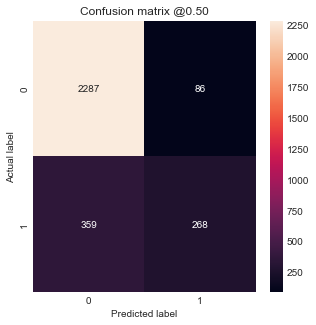

In [31]:
xgb_final = XGBClassifier(learning_rate=0.015, max_depth=3, max_features=3, n_estimators=450)
xgb_final.fit(X_train, y_train)
plot_cm(y_test, xgb_final.predict(X_test))

<b>ROC & AUC<b>

In [36]:
from sklearn.metrics import RocCurveDisplay

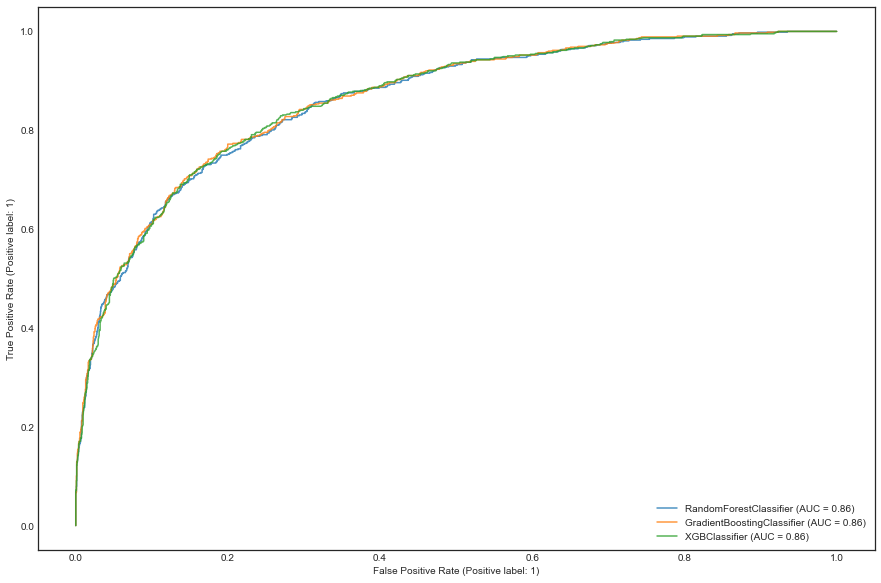

In [39]:
#Since rf_final and gb_final are so close together, lets ROC them
ax=plt.gca()
rf_display = RocCurveDisplay.from_estimator(rf_final, X_test, y_test, ax=ax, alpha=0.8)
gb_display = RocCurveDisplay.from_estimator(gb_final, X_test, y_test, ax=ax, alpha=0.8)
xgb_display = RocCurveDisplay.from_estimator(xgb_final, X_test, y_test, ax=ax, alpha=0.8)
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

In [40]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_final.predict_proba(X_test)
gb_probs = gb_final.predict_proba(X_test)
xgb_probs = xgb_final.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
gb_probs = gb_probs[:, 1]
xgb_probs = xgb_probs[:, 1]

In [41]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Gradient Boost: AUROC = %.3f' % (gb_auc))
print('XG Boost: AUROC = %.3f' % (xgb_auc))

Random Forest: AUROC = 0.860
Gradient Boost: AUROC = 0.862
XG Boost: AUROC = 0.862


In [120]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
print('Random Forest: AUROC = %.3f',  (rf_auc))
print('Gradient Boost: AUROC = %.3f',  (gb_auc))
print('XG Boost: AUROC = %.3f',  (xgb_auc))

Random Forest: AUROC = %.3f 0.8599058654950597
Gradient Boost: AUROC = %.3f 0.8623244219424937
XG Boost: AUROC = %.3f 0.8615656196000863


In [127]:
tree_probs = tree_interpretable.predict_proba(X_test)
# logit_probs = result.predict_proba(X_test)
qda_probs = qda.predict_proba(X_test)
tree_probs = tree_probs[:, 1]
# logit_probs = logit_probs[:, 1]
qda_probs = qda_probs[:, 1]

In [129]:
tree_auc = roc_auc_score(y_test, tree_probs)
qda_auc = roc_auc_score(y_test, qda_probs)
print('tree: AUROC = %.3f',  (tree_auc))
print('qda: AUROC = %.3f',  (qda_auc))


tree: AUROC = %.3f 0.7992359552676273
qda: AUROC = %.3f 0.8037551642581918
